In [191]:
import ctypes #tablice niskopoziomowe
import random
from timeit import default_timer as timer
import re
from matplotlib import pyplot as plt

# Zadanie 1

In [192]:
#zaimplementowanie klasy dynamic array z wykładu

class DynamicArray:

    def __init__(self):
        self._n = 0                                     #liczba elementów
        self._capacity = 1                              #rozmiar tablicy
        self._A = self._make_array(self._capacity)      #właściwa tablica
    
    def __len__(self):
        return self._n
    
    def __getitem__(self, k):
        if not 0 <= k < self._n:
            raise IndexError("invalid index")
        return self._A[k]
    
    def __str__(self):
        #tworzy stringa sklejając wyraz po wyrazie tablicy

        temp = "|"
        for i in range(0,self._n):
            temp += f"{self._A[i]}|"
        for i in range(0,self._capacity-self._n):
            temp += " |"
        return(temp)
    
    def append(self,obj):
        if self._n == self._capacity:
            self.resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1

    def resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c

    def _make_array(self,c):
        return(c*ctypes.py_object)()
    
    #metody z zadania 1
    def insert(self, k, value):
        if not 0 < k <= self._n:
            raise IndexError("invalid index")
        else:       
            if self._n == self._capacity:       #sprawdza czy jest miejsce
                self.resize(2*self._capacity)    
            for i in range(0,self._n - k + 1):        #przesuwa o jeden dalej
                self._A[self._n-i] = self._A[self._n - i - 1] 
        self._A[k-1] = value                  #dodaje wartość
        self._n += 1                        #zwiększa licznik

    def remove(self, value):    #znajdzie i usunie pierwsze wystąpienie value, dziurę zaklei
        k = 0
        #znajduje pierwsze wystąpienie value
        for i in range(0,self._n):
            if self._A[i] == value:
                k = i
                break
        #przesuwa wartości o jeden w stronę value, by je usunąć
        for i in range(k,self._n-1):
            self._A[i] = self._A[i+1]
        self._n -= 1
        #robi resize by pozbyć się ostatniego zduplikowanego elementu
        self.resize(self._capacity)
    
    def expand(self,seq):
        #sprawdza czy jest miejsce
        if self._capacity < self._n + len(seq):
            self.resize(self._n + len(seq))
        #wstawia
        for i in range(0,len(seq)):
            self._A[self._n + i] = seq[i]
        self._n = self._n + len(seq)


In [193]:
dynamic = DynamicArray()
dynamic.append(1) 
dynamic.append(2) 
dynamic.append(3)
dynamic.append(4)
dynamic.append(5)
dynamic.expand([10,11,12,13,14,15])
print(dynamic)


|1|2|3|4|5|10|11|12|13|14|15|


# Zadanie 2

In [194]:
def measure_time_pop(seq,n):
    start = timer()
    #t = time.process_time()
    seq.pop(n)
    #t2 = time.process_time()
    end = timer()
    return (end-start)

Text(0, 0.5, 'times')

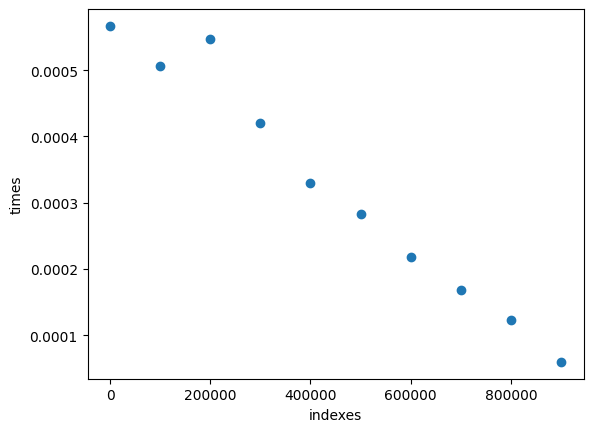

In [195]:
seq = [i for i in range(0,1000000)]
measurements = []
for idx in range(0,len(seq),100000):       #dla jakiego indexu 
    mean = 0
    for i in range(0,10):           #ilość pomiarów do średniej
        mean += measure_time_pop(seq,idx)
        seq = [i for i in range(0,1000000)]
    mean = mean / 10
    measurements.append(mean)


fig, ax = plt.subplots()
ax.scatter(range(0,len(seq),100000),measurements)
ax.set_xlabel("indexes")
ax.set_ylabel("times")



czas liniowo maleje dla wyższych indeksów 

# Zadanie 3

In [196]:
def r2summ(seq):
    if type(seq) == type([]):
        sum=0
        for el in seq:
            if type(el) == type([]):
                summ = 0
                for ell in el:
                    summ += ell
                sum += summ
            else:
                sum = "zły rodzaj tablicy"
                break
    else:
        sum = "zły rodzaj tablicy"

    return sum        


In [197]:
tabr2 = [[random.randint(-10,10) for i in range(0,2)] for i in range(0,10)]
print(r2summ(tabr2))

49


# Zadanie 4

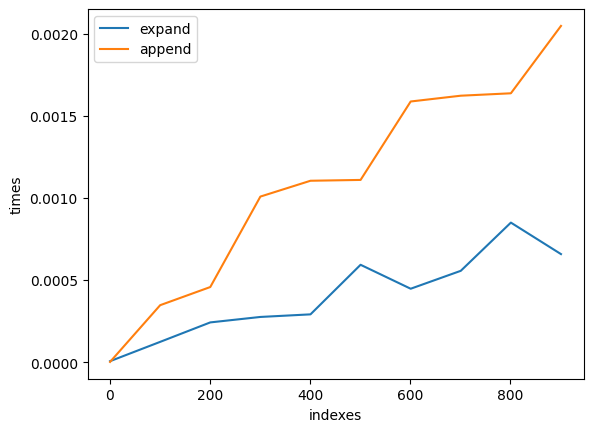

In [198]:

measurements1 = []
measurements2 = []

for i in range(1,1000,100):   #ilość dodawanych elementów
    
    measure_time1 = 0
    measure_time2 = 0
    
    for j in range(0,10):   #ilość pomiarów
        dynamic = DynamicArray()
        stop = timer()
        dynamic.expand(list(range(0,i)))
        end = timer()
        measure_time1 += (end - stop)
    
    for j in range(0,10):   #ilość pomiarów
        dynamic = DynamicArray()
        stop = timer()
        for i in range(0,i):
            dynamic.append(i)
        end = timer()
        measure_time2 += (end - stop)
   
   
    measurements1.append(measure_time1/10)
    measurements2.append(measure_time2/10)


fig, ax = plt.subplots()
ax.plot(range(1,1000,100),measurements1, label = "expand")
ax.plot(range(1,1000,100),measurements2, label = "append" )
ax.set_xlabel("indexes")
ax.set_ylabel("times")
ax.legend()
    

# Zadanie 5

In [199]:
#klasa kolejki z wykładu
class Empty(Exception):
    pass
class Queue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None] * Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
    
    def __len__(self):
        return self._size
    
    def __str__(self):
        return str(self._data) + f" ,{self.first()}"

    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty("Queue is empty")
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        #te linijki przeszkadzają w implementacji stosu za pomocą kolejki
        if self._size <= round(len(self._data)/4):
            self.resize(round(len(self._data)/2))
        return value

    def enqueue(self, e):
        if self._size == len(self._data):
            self.resize(2*len(self._data))
        avail = (self._front + self._size) % len(self._data)
        self._data[avail] = e
        self._size += 1

    def resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0
        


In [200]:
queue = Queue()
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()


print(queue._size)
print(queue)

4
[None, 1, 1, 1, 1, None, None, None, None, None] ,1


# Zad 6

In [201]:
class DoubleQueue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        #deklaracja najważniejszych stałych
        self._data = [None] * DoubleQueue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0   
    
    def __len__(self):
        return self._size
    
    def __str__(self):
        # zaczynając od indexu self._front i zwiększając go (idąc w prawo w tablicy) wypisujemy wszystkie elementy po kolej do nowej i wypisujemy
        toprint = []
        for i in range(self._size):
            toprint.append(self._data[(self._front + i) % len(self._data)])
        return(str(toprint) + f", front:{self.front()}, back:{self.back()}")

    def is_empty(self):
        return self._size == 0
    

    def resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0

    def front(self): 
        if self.is_empty():
            raise Empty("Queue is empty")
        else:
            return self._data[self._front]

    def back(self):
        if self.is_empty():
            raise Empty("Queue is empty")
        else:
            return self._data[(self._front + self._size - 1) % len(self._data)]

    def add_first(self,el):
        #dodając element na początek kolejki patrzymy co jest "na lewo" od indexu self._front i tam wstawiamy nowy element,
        #jesli self._front to 0 to idziemy od końca
        if self._front == 0:
            if self._data[len(self._data) - 1] != None:
                self.resize(len(self._data)*2)
            self._front = len(self._data) - 1
            self._data[self._front] = el
            self._size +=1
            
        else:
            if self._data[self._front - 1] != None:
                self.resize(len(self._data)*2)
            self._front -= 1 
            self._data[self._front] = el
            self._size += 1
    
    
    def add_last(self,el):
        #dodając element na koniec kolejki dodajemy go "na prawo" od wszystkich elementów, zaczynamy od indexu self._front, idziemy tyle kroków ile jest elementów
        #w kolejce (w razie potrzeby wracamy na początek tablicy) i sprawdzamy miejsce docelowe
        if self._data[(self._front + self._size) % len(self._data)] != None:
            self.resize(len(self._data)*2)
        self._data[(self._front + self._size) % len(self._data)] = el
        self._size += 1

    def delete_first(self):
        #wyciągany element o indexie self._front
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        return value

    def delete_last(self):
        #wyciągamy element o indexie self._front zwiększony o liczbę elementów (zawinięty)
        value = self._data[(self._front + self._size - 1) % len(self._data)]
        self._data[(self._front + self._size - 1) % len(self._data)] = None
        self._size -= 1
        return value






In [202]:
dque = DoubleQueue()
dque.add_first(1)
dque.add_first(2)
dque.add_last(3)
print(dque)



[2, 1, 3], front:2, back:3


# Deklaracja stosu do zadań 7, 8, 10

In [203]:
class Stack():
    def __init__(self):
        self._data = []     #nowy pusty stos

    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data) == 0
    
    def push(self, e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()

# Zadanie 7

In [214]:
def html_check(txt):
    """
    Opis:  
        Funkcja sprawdzająca poprawność składni html danego ciągu znaków

    Argumenty:
        txt : str 
            string zawierający kod html do sprawdzenia

    Zwraca:
        - True dla poprawnej składni
        - False dla niepoprawnej składni
    
    """

    #regexy
    comments =  "<!--.*?-->"
    declarations = "<!.*?>"
    html_tag = "<.*?>"

    #tablica samozamykających się znaczników
    self_closing = ["area","base","br","col","embed","hr","img","link","meta","param","source","track","wbr","command","keygen","menuitem","frame"]

    txt = re.sub(comments,"",txt)               #usuwa komentarze
    txt = re.sub(declarations,"",txt)           #usuwa deklaracje

    result = re.findall(html_tag,txt)           #znajdujemy wszystkie pozostałe znaczniki

    #wycinamy tylko nazwę samego znacznika oraz znak /, bez znaków <>, bez atrybutów, znaków białych i tym podobnych
    tags=[]
    for el in result:
        splited = el.split(" ")
        if len(splited) > 1:
            tags.append(el[1:len(splited[0])].lower())      #wybiera tylko znaki znacznika do pierwszej spacji
            #print(el[1:len(splited[0])])  
        else:
            tags.append(el[1:-1].lower())                   
            #print(el[1:-1]) 


    tag_stack = Stack()
    correct = True

    #wykonujemy dla każdego znalezionego znacznika
    while len(tags):
        if tags[0] in self_closing:             #pomijamy samozamykające się 
            tags.pop(0)
            continue
        if (len(tag_stack) > 0) and tags[0][0] == "/":      #dla zamykających sprawdzamy górę stosu czy pasują do siebie
            if (tag_stack.top() != tags[0][1:]):  
                correct = False                #jeśli się różnią to jest to błąd składni
                break
            else:
                tag_stack.pop()
                tags.pop(0)
        else:                                               #wszystkie otwierające dodajemy do stosu
            tag_stack.push(tags.pop(0))

    #obsługa wyniku
    if correct and tag_stack.is_empty():
        print("Składnia poprawna")
        return 1
    else:
        print("Składnia niepoprawna")
        return(0)






In [218]:
file = open("../assets/HTML_sample3.txt","r")
txt = file.read()
html_check(txt)



Składnia niepoprawna


0

# Zadanie 8

In [220]:
def permstack(seq):
    """
    Opis:  
        Funkcja wypisująca wszystkie permutacje podanego zbioru

    Argumenty:
        seq : list 
            lista zawierająca dowolne elementy

    Zwraca:
        -
    
    """
    obj = [seq,[]]  # jako pierwszy element: zbiór pozostałych elementów do ustawienia w ciąg, po prawej: pojedyńcza permutacja

    stack = Stack()

    stack.push(obj)     # zaczynamy mając wszystkie elementy zbioru do wykorzystania / ustawienia w ciąg
    while len(stack)>0:
        obj = stack.pop()
        if len(obj[0]) > 1:              
            #jeśli pozostało więcej niż 1 wyrazów do ustawienia w ciąg to dla każdego takiego wyrazu dodajemy na stos nowy obj gdzie dany wyraz usuwamy z pierwszej pozycji i dodajemy na drugą, obecny obj zostaje usunięty i nie wraca na stos    
            for i in range(0,len(obj[0])):     
                stack.push([obj[0][:i]+obj[0][i+1:], obj[1] + [obj[0][i]]])
        else:
            #przypadek bazowy, jeśli pozostał tylko jeden element do ustawienia (pierwszy element obj) to mamy gotową permutację
            print(obj[1]+obj[0])

    

In [208]:
permstack([1,2,3])


[3, 2, 1]
[3, 1, 2]
[2, 3, 1]
[2, 1, 3]
[1, 3, 2]
[1, 2, 3]


# Zad 9 


In [209]:
class QueueStack():
    def __init__(self):
        self._queue = Queue()

    def __len__(self):
        return self._queue._size

    def __str__(self):
        return str(self._queue._data)
    
    def is_empty(self):
        return self._queue._size == 0
    
    def push(self, e):
        self._queue.enqueue(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._queue._data[self._queue._front + self._queue._size -1]
    
    def pop(self):
        #jeśli w queue będzie działał resize zmniejszający, to nie zadziała
        if self.is_empty():
            raise Empty('Stack is empty')
        else:
            # na chwilę ustawiamy front jako koniec kolejki by wyciągnąć ostatni element który został dodany, następnie ustawiamy front na początek kolejki
            self._queue._front = (self._queue._front + self._queue._size -1) % len(self._queue._data)
            val = self._queue.dequeue()
            self._queue._front = 0
            return  val

In [210]:
thing = QueueStack()
thing.push(1)
thing.push(2)
thing.push(3)
print(thing.top())
print(len(thing))
print(thing._queue._front)
thing.pop()



print(thing)

3
3
0
[None, None, None, None, None]


# Zad 10
    

In [211]:
class StackQueue():
    def __init__(self):
        self._stack1 = Stack()
        self._stack2 = Stack()

    def __len__(self):
        return len(self._stack1)
    
    def __str__(self):
        if self._stack1.is_empty():
            return(f"{self._stack1._data}")
        else:
            return(f"{self._stack1._data}, first:{self._stack1._data[0]}")
    
    def is_empty(self):
        return self._stack1.is_empty()
    
    def enqueue(self,el):
        self._stack1.push(el)
    
    def dequeue(self):
        #za pomocą drugiego stosu odwracamy kolejność elementów, by mieć pierwszy dodany element na wierzchu i móc go wyciągnąć
        for i in range(len(self._stack1)):
            self._stack2.push(self._stack1.pop())
        value = self._stack2.pop()
        
        #czyścimy pierwszy stack1 i pushując do niego po kolej elementy z drugiego stack2 otrzymujemy znowu poprawną kolejność kolejki
        self._stack1 = Stack()
        for i in range(len(self._stack2)):
            self._stack1.push(self._stack2.pop())
        self._stack2 = Stack()
        return value
        
            
    

In [212]:
stackqueue = StackQueue()
stackqueue.enqueue(0)
stackqueue.enqueue(1)
stackqueue.enqueue(2)
stackqueue.enqueue(3)
print(stackqueue.dequeue())
print(stackqueue)

0
[1, 2, 3], first:1
